In [105]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from statsmodels.stats import diagnostic
from scipy import stats

## First step : Data pre-processing

During, this step, we will process the data, clean and merge all the informations needed for the project. 
We will clean all the csv files one by one, and then create a new database with only the informations needed. 

- **beers_matched.csv** 

### 1. Cleaning and pre-processing of the file "beers_matched.csv"

The first step in our project is to select only the beers whose the number or ratings is significant as we want to analyze which are the beers the most popular over time. Indeed, many beers on both websites have no ratings, so we have decided to filter them out. <br><br>
At first insight of the many datsets provided, we have decided to work on the file *beer_matched*. <br> <br>**Why ?** Because, one can think that the most popular beers (i.e. with an important number of ratings) will be refered on both websites. In an opposite way, the beers we would lose while only working on the matched_beer dataset would be the less popular ones with a few number of reviews. 
As our analysis will be based on the most popular beers, losing them is not a problem here.

In [106]:
beers = pd.read_csv("Data/beers_matched.csv", delimiter=",", header=[0,1])
beers.head()

ba                                                                \
   abv   avg avg_computed avg_matched_valid_ratings ba_score beer_id   
0  4.8  3.45     3.439867                  3.504068     80.0   19827   
1  6.0  3.86     3.888750                  3.768333      NaN   20841   
2  4.2  3.56     3.556094                  3.580417     82.0   20842   
3  4.8  3.96     3.960000                  3.960000      NaN   22659   
4  4.5   NaN          NaN                       NaN      NaN  178681   

                                                         \
            beer_name beer_wout_brewery_name brewery_id   
0            Legbiter               Legbiter      10093   
1   St. Patrick's Ale        Patricks Ale St      10093   
2  St. Patrick's Best       Patricks Best St      10093   
3  St. Patrick's Gold       Patricks Gold St      10093   
4       Sheelin Stout                  Stout      32848   

                                         ...         rb                    \
                           brewery_name  ... brewery_id      brewery_name   
0  Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
1  Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
2  Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
3  Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
4                   The Sheelin Brewery  ...      17616           Sheelin   

                                                                             \
  nbr_matched_valid_ratings nbr_ratings overall_score                 style   
0                        89          89          23.0  Golden Ale/Blond Ale   
1                        11          11          52.0             Irish Ale   
2                        74          74          26.0                Bitter   
3                         4           4           NaN             Amber Ale   
4                         2           2           NaN              Mild Ale   

                           scores       
  style_score    zscore      diff  sim  
0        27.0 -0.698304  1.000000  1.0  
1        79.0  0.005754  0.527141  1.0  
2        25.0 -0.862119  0.527141  1.0  
3         NaN -0.758491  0.527141  1.0  
4         NaN -0.347271  1.000000  1.0  

[5 rows x 33 columns]

In [107]:
print ("Shape of the DataFrame : {size}".format(size = beers.shape))

Shape of the DataFrame : (45640, 33)


To analyse more easily the data in the following steps, let's take off the columns which are unisgnificant for the moment.  

In [108]:
beers.columns[20:]

MultiIndex([(    'rb',                   'beer_id'),
            (    'rb',                 'beer_name'),
            (    'rb',    'beer_wout_brewery_name'),
            (    'rb',                'brewery_id'),
            (    'rb',              'brewery_name'),
            (    'rb', 'nbr_matched_valid_ratings'),
            (    'rb',               'nbr_ratings'),
            (    'rb',             'overall_score'),
            (    'rb',                     'style'),
            (    'rb',               'style_score'),
            (    'rb',                    'zscore'),
            ('scores',                      'diff'),
            ('scores',                       'sim')],
           )

In [109]:
beers2 = beers.iloc[:, [5,6, 11, 12, 13, 20, 21, 25, 26]]
beers2

ba                                                            \
      beer_id           beer_name nbr_matched_valid_ratings nbr_ratings   
0       19827            Legbiter                        59          75   
1       20841   St. Patrick's Ale                         6           8   
2       20842  St. Patrick's Best                        48          64   
3       22659  St. Patrick's Gold                         1           1   
4      178681       Sheelin Stout                         0           0   
...       ...                 ...                       ...         ...   
45635   96911            Pale Ale                         3           4   
45636   37457    Mustang Gold Ale                        21          22   
45637   47287        Shanty Irish                         9          10   
45638   37177   Thunderbolt Wheat                        20          21   
45639   36418    Warhawk Pale Ale                        36          38   

                       rb                                      \
      nbr_reviews beer_id                           beer_name   
0              59   37923           Strangford Lough Legbiter   
1               6   41286   Strangford Lough St. Patricks Ale   
2              48   41287  Strangford Lough St. Patricks Best   
3               1   41285  Strangford Lough St. Patricks Gold   
4               0  230283                       Sheelin Stout   
...           ...     ...                                 ...   
45635           3  242782                     Do Can Pale Ale   
45636          21   68764            Warbird Mustang Gold Ale   
45637           9   76984                Warbird Shanty Irish   
45638          20   78298          Warbird Thunderbolt Wheat    
45639          36   68765            Warbird Warhawk Pale Ale   

                                             
      nbr_matched_valid_ratings nbr_ratings  
0                            89          89  
1                            11          11  
2                            74          74  
3                             4           4  
4                             2           2  
...                         ...         ...  
45635                         1           1  
45636                        57          57  
45637                        50          50  
45638                        59          59  
45639                        69          69  

[45640 rows x 9 columns]

We won't need all the beers refered in this dataset. We actually want to check the popularity of beers over time, so we want to take off all the beers which are unsignificant for our analysis. <br> Let's first check a basic description of the feature 'nbr_ratings' for each website. 

In [110]:
ba_ratings = beers2.ba.nbr_ratings.describe()
#ba_matched_ratings = beers2.ba.nbr_matched_valid_ratings.describe()
rb_ratings = beers2.rb.nbr_ratings.describe()
#rb_matched_ratings = beers2.rb.nbr_matched_valid_ratings.describe()

stats_ratings = pd.DataFrame({  'ba_ratings' : ba_ratings, 
                                'rb_ratings' : rb_ratings,
                            })

stats_ratings

,ba_ratings,rb_ratings
count,45640.000000,45640.000000
mean,20.945837,22.362796
std,137.768038,80.107455
min,0.000000,0.000000
25%,1.000000,2.000000
50%,3.000000,5.000000
75%,8.000000,16.000000
max,9228.000000,5272.000000


` To check : diff between ba_matched_valid_ratings VS nb_ratings `

We will only focus on the features 'ba_ratings' and 'rb_ratings' as we loose a lot of informations with the feature 'ba_matched_ratings'. <br>
We can see that many beers have no ratings on both websites. Indeed, the half of the beers have 3 ratings or less for the website *BeerAdvocate* and 5 ratings or less for *RateBeer*. But we can see that the mean is higher for the two websites (~ 21 ratings BA and 22 for RB). <br>

Now, let's check if the number or ratings of each beer is correlated between the two websites.

c:\Users\affol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


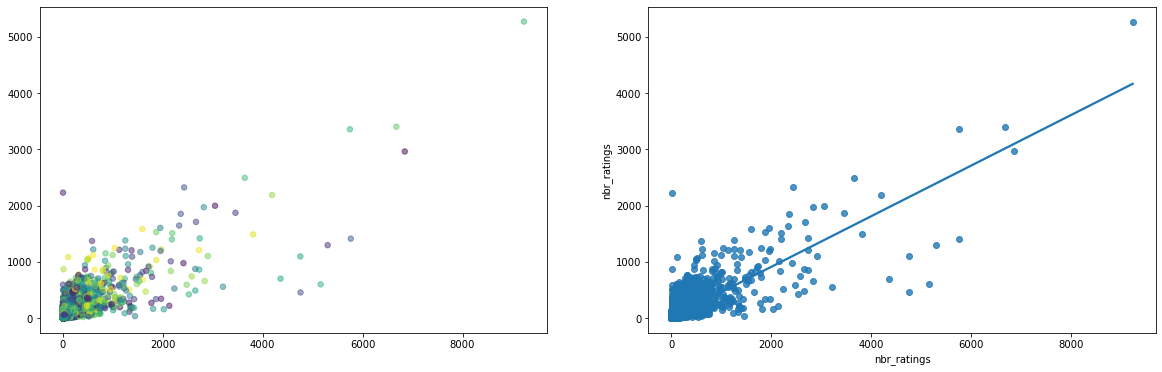

In [111]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
colors = np.random.rand(beers2.shape[0])
plt.scatter(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'], s=30, alpha=0.5, c= colors)

plt.subplot(1, 2, 2)
sns.regplot(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'], ci=None)

plt.show()

`Add legends`

In [112]:
print('Pearson coefficient : {pearson}'.format(pearson = stats.pearsonr(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'])))
print('Spearman coefficient : {spearman}'.format(spearman = stats.spearmanr(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'])))
stats.ttest_rel(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'])

Pearson coefficient : (0.7737549101334047, 0.0)
Spearman coefficient : SpearmanrResult(correlation=0.4941042211279968, pvalue=0.0)


Ttest_relResult(statistic=-3.318994921163729, pvalue=0.0009041276417921556)

We can see that the number of ratings of each beer from the two websites are very correlated. 
- The p-values of the two tests are equals to 0, so the correlation is significant. 
- The p-value of the paired t-test is also very low, which means that the results are pairwise correlated. 
<br> <br>Hence, we can sum the number of ratings from each website in order to filter our data afterwise.

In [113]:
beers2['merged', 'nbr_ratings'] = beers2['ba', 'nbr_ratings'] + beers2['rb', 'nbr_ratings']
beers2.head()

C:\Users\affol\AppData\Local\Temp\ipykernel_34048\1252895236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beers2['merged', 'nbr_ratings'] = beers2['ba', 'nbr_ratings'] + beers2['rb', 'nbr_ratings']


ba                                                            \
  beer_id           beer_name nbr_matched_valid_ratings nbr_ratings   
0   19827            Legbiter                        59          75   
1   20841   St. Patrick's Ale                         6           8   
2   20842  St. Patrick's Best                        48          64   
3   22659  St. Patrick's Gold                         1           1   
4  178681       Sheelin Stout                         0           0   

                   rb                                      \
  nbr_reviews beer_id                           beer_name   
0          59   37923           Strangford Lough Legbiter   
1           6   41286   Strangford Lough St. Patricks Ale   
2          48   41287  Strangford Lough St. Patricks Best   
3           1   41285  Strangford Lough St. Patricks Gold   
4           0  230283                       Sheelin Stout   

                                             merged  
  nbr_matched_valid_ratings nbr_ratings nbr_ratings  
0                        89          89         164  
1                        11          11          19  
2                        74          74         138  
3                         4           4           5  
4                         2           2           2

Now, let's look at some basic statistics. 

In [114]:
beers2.merged.nbr_ratings.describe()

count    45640.000000
mean        43.308633
std        206.096912
min          0.000000
25%          4.000000
50%          9.000000
75%         28.000000
max      14500.000000
Name: nbr_ratings, dtype: float64

Still many beers don't have many ratings on both websites. Hence, to make our analysis more significant, we have decided to take off all the beers with a number of ratings smaller or equals to the value of the mean. Actually, to evaluate the popularity of one beer over time, having only 10 ratings or even less is not meaningful for our project. 

In [115]:
mean = beers2.merged.nbr_ratings.mean()
beers_filtered = beers2.loc[beers2['merged']['nbr_ratings'] > mean]
print("Shape before filtering : {s1}\nShape after filtering : {s2}".format(s1=beers.shape[0], s2=beers_filtered.shape[0]))
beers_filtered.head()

Shape before filtering : 45640
Shape after filtering : 7833


ba                                                               \
   beer_id              beer_name nbr_matched_valid_ratings nbr_ratings   
0    19827               Legbiter                        59          75   
2    20842     St. Patrick's Best                        48          64   
42  114436            Brigid Fire                         4           6   
43   69626                 Bronze                        34          53   
50  212312  Goddess Of The Spring                         1           2   

                    rb                                         \
   nbr_reviews beer_id                              beer_name   
0           59   37923              Strangford Lough Legbiter   
2           48   41287     Strangford Lough St. Patricks Best   
42           2  244927       Celt Experience Celt Brigid Fire   
43          34   89894            Celt Experience Celt Bronze   
50           1  326990  Celt Experience Goddess Of The Spring   

                                              merged  
   nbr_matched_valid_ratings nbr_ratings nbr_ratings  
0                         89          89         164  
2                         74          74         138  
42                        83          83          89  
43                       185         185         238  
50                        49          49          51

In [116]:
beers_filtered.merged.nbr_ratings.describe()

count     7833.000000
mean       201.445551
std        465.634521
min         44.000000
25%         59.000000
50%         90.000000
75%        170.000000
max      14500.000000
Name: nbr_ratings, dtype: float64

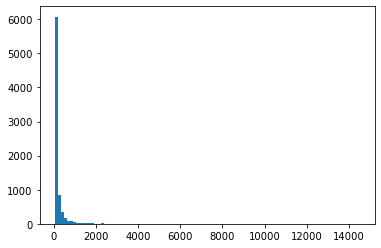

In [117]:
plt.hist(beers_filtered['merged']['nbr_ratings'], bins = 100)
plt.show()

The distribution of the number of ratings on the two websites is still unbalanced with 50% of the beers with a value under 90, whereas only 25% of the data is between 170 and 14500. We would like to only keep these 25% of the beers at first insight because only 90 ratings is still not much, but we will continue with this dataset for the moment because we would lose a lot of data otherwise. But we will keep in mind that observation if our analysis won't be successful. 

Now, let's go back to the initial DataFrame and filter out the rows we have selected above. 

In [118]:
index_to_filter = beers_filtered.index
new_beers = beers.iloc[index_to_filter,:]
new_beers.head()

ba                                                                \
    abv   avg avg_computed avg_matched_valid_ratings ba_score beer_id   
0   4.8  3.45     3.439867                  3.504068     80.0   19827   
2   4.2  3.56     3.556094                  3.580417     82.0   20842   
42  6.3  3.90     3.893333                  3.780000      NaN  114436   
43  4.5  3.71     3.691509                  3.732353     84.0   69626   
50  6.0  3.72     3.755000                  3.690000      NaN  212312   

                                                             \
                beer_name beer_wout_brewery_name brewery_id   
0                Legbiter               Legbiter      10093   
2      St. Patrick's Best       Patricks Best St      10093   
42            Brigid Fire            Fire Brigid      20776   
43                 Bronze                 Bronze      20776   
50  Goddess Of The Spring      Spring Goddess Of      20776   

                                          ...         rb                    \
                            brewery_name  ... brewery_id      brewery_name   
0   Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
2   Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
42                   The Celt Experience  ...      14338   Celt Experience   
43                   The Celt Experience  ...      14338   Celt Experience   
50                   The Celt Experience  ...      14338   Celt Experience   

                                                                              \
   nbr_matched_valid_ratings nbr_ratings overall_score                 style   
0                         89          89          23.0  Golden Ale/Blond Ale   
2                         74          74          26.0                Bitter   
42                        83          83          87.0       Specialty Grain   
43                       185         185          52.0                Bitter   
50                        49          49          78.0                Saison   

                            scores            
   style_score    zscore      diff       sim  
0         27.0 -0.698304  1.000000  1.000000  
2         25.0 -0.862119  0.527141  1.000000  
42        96.0  0.190947  1.000000  1.000000  
43        92.0 -0.346027  1.000000  1.000000  
50        58.0  0.017223  0.603086  0.915537  

[5 rows x 33 columns]

In [119]:
new_beers.to_csv('Data/beers_matched_filtered.csv', sep=',')

We keep some values we will need in the next parts of our data pre-processing. 

In [120]:
beer_ids_ba = new_beers.ba.beer_id
beer_ids_rb = new_beers.rb.beer_id

### Is it clever to only use the file "beers_matched" ? 

In order to be sure that we are not losing informations while only keeping the beers from the file beers_matched, we just want to check if doing the same work with the two files 'beers_ba' and 'beers_rb' separately will give the same number of beers after filtering out the ones with very few ratings. 

In [121]:
beers_matched = beers
beers_rb = pd.read_csv('RateBeer/beers_rb.csv', delimiter=',')
beers_ba = pd.read_csv('BeerAdvocate/beers_ba.csv', delimiter=',')

In [122]:
rb_ratings_matched = beers_matched.rb.nbr_ratings.describe()   #Stats from the merged dataset before filtering
ba_ratings_matched = beers_matched.ba.nbr_ratings.describe()   #Stats from the merged dataset before filtering

rb_ratings = beers_rb.nbr_ratings.describe()

ba_ratings = beers_ba.nbr_ratings.describe()

compare_rb_ratings = pd.DataFrame({
                                    'RB before filtering' : rb_ratings,
                                    'Merged RB before filtering' : rb_ratings_matched,
                                    'BA before filtering' : ba_ratings,
                                    'Merged BA before filtering' : ba_ratings_matched,

                                    })
compare_rb_ratings

,RB before filtering,Merged RB before filtering,BA before filtering,Merged BA before filtering
count,442081.000000,45640.000000,280823.000000,45640.000000
mean,16.110337,22.362796,29.887267,20.945837
std,80.988812,80.107455,231.010063,137.768038
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000
50%,3.000000,5.000000,2.000000,3.000000
75%,9.000000,16.000000,8.000000,8.000000
max,5272.000000,5272.000000,16509.000000,9228.000000


Our first idea to work on the merged dataset to select beers with the highest number of ratings might not be the best one given the results obtained above.
- First, we are losing a lot of beers. Even if some beers are similar in both of the websites, we have 443 081 beers on Rate Beer and 280 823 on Beer Advocate, whereas only 45 640 on the merged dataset. We don't want to loose all this information. 
- Secondly, we can see that the maximum number of ratings is equals to 16 509 on the BeerAdvocate dataset, which is a very important information for us. On the matched beer dataset, the highest value is only 9 228, almost the half of the one on BA. We are losing information on the merged dataset, and moreover, these informations are crucial for us. 

Now, let's filter out for the BA and RB datasets the beers with a number or ratings smaller than the mean (~ 16 for RateBeer and ~ 29 for BeerAdvocate).

In [135]:
beers_rb_filtered = beers_rb.loc[beers_rb['nbr_ratings']>beers_rb.nbr_ratings.mean()]
beers_ba_filtered = beers_ba.loc[beers_ba['nbr_ratings']>beers_ba.nbr_ratings.mean()]
beers_matched_filtered = beers_filtered

In [157]:
rb_ratings_matched_filtered = beers_matched_filtered.rb.nbr_ratings.describe()   #Stats from the merged dataset before filtering
ba_ratings_matched_filtered = beers_matched_filtered.ba.nbr_ratings.describe()   #Stats from the merged dataset before filtering
ratings_matched_filtered = beers_matched_filtered.merged.nbr_ratings.describe()   #Stats from the merged dataset before filtering

rb_ratings_filtered = beers_rb_filtered.nbr_ratings.describe()

ba_ratings_filtered = beers_ba_filtered.nbr_ratings.describe()

compare_ratings_filtered = pd.DataFrame({
                                    'RB after filtering' : rb_ratings_filtered,
                                    'Merged RB after filtering' : rb_ratings_matched_filtered,
                                    'BA after filtering' : ba_ratings_filtered,
                                    'Merged BA after filtering' : ba_ratings_matched_filtered,
                                    'Merged BA+RB after filtering' : ratings_matched_filtered,

                                    })
compare_ratings_filtered                               

,RB after filtering,Merged RB after filtering,BA after filtering,Merged BA after filtering,Merged BA+RB after filtering
count,69192.000000,7833.000000,28852.000000,7833.000000,7833.000000
mean,84.408053,99.581514,254.520345,101.864037,201.445551
std,190.538177,172.908450,680.384027,320.223425,465.634521
min,17.000000,1.000000,30.000000,0.000000,44.000000
25%,23.000000,32.000000,44.000000,8.000000,59.000000
50%,36.000000,56.000000,77.000000,35.000000,90.000000
75%,70.000000,102.000000,184.000000,78.000000,170.000000
max,5272.000000,5272.000000,16509.000000,9228.000000,14500.000000


Now, we have again something interesting.
<br><br> First, we can see that we get so much interesting results for the BeerAdvocate dataset after filtering compared to the merged one. Indeed, we still many more beers (28 852 vs 7 833), the mean is higher (254 vs 101, more than the double), and 25% (~ 7213) of the beers have a number of ratings greater than 184, which almost the number of beers we have in the matched dataset. 
<br><br>Moreover, we get the same observations while comparing the BeerAdvocate dataset after filtering and the merged one with the sum of the ratings on the two websites for the matched beers ('Merged RA + RB after filtering'). The mean is higher on BeerAdvocate (254 vs 201), the max also (16 509 vs 14 500) and we have 7 214 beers with a number of ratings greater than 184 vs 1 958 for the merged RA + RB ! 
<br><br>Finally, the RateBeer dataset has more beers than BeerAdvocate (691 192 vs 28 852), but the mean and the median are less important, which means that it contains many more small values. Indeed, the 75% quantile is equals to 70 for BeerAdvocate, which is smaller than the value of the 50% quantile of the BeerAdvocate dataset after filtering. 

<br>**Solutions**
- We will not work on the merged dataset. 
- During our project, we will work independantly on the datasets from the two websites and in the final step, we will compare and merge our results. 
- We will continue to filter out some beers from the RateBeer and BeerAdvocate datasets by taking off the beers whose the number of ratings is smaller than the value of the 75% quantile for RB and the median for BA. 

In [165]:
quantile_75_rb = beers_rb_filtered.nbr_ratings.quantile(q=0.75)
quantile_75_ba = beers_ba_filtered.nbr_ratings.quantile(q=0.5)

In [166]:
beers_rb_filtered2 = beers_rb.loc[beers_rb['nbr_ratings']>quantile_75_rb]
rb_ratings_filtered2 = beers_rb_filtered2.nbr_ratings.describe()

beers_ba_filtered2 = beers_ba.loc[beers_ba['nbr_ratings']>quantile_75_ba]
ba_ratings_filtered2 = beers_ba_filtered2.nbr_ratings.describe()

In [167]:
ratings_final = pd.DataFrame({
                                'RB after filtering' : rb_ratings_filtered2,
                                'BA after filtering' : ba_ratings_filtered2,
                            })
ratings_final

,RB after filtering,BA after filtering
count,17224.000000,14363.000000
mean,240.261960,463.499617
std,336.032576,918.033452
min,71.000000,78.000000
25%,92.000000,112.000000
50%,132.000000,185.000000
75%,236.250000,413.000000
max,5272.000000,16509.000000


Finally, we write the two datasets filtered we'll gonna use during the project in two different files. 

In [170]:
beers_ba_filtered2.to_csv('BeerAdvocate/beers_ba_filtered.csv')
beers_rb_filtered2.to_csv('RateBeer/beers_rb_filtered.csv')

### 2. Retrieve the dates associated to each beer review from both website 

To be able to make our analysis, we need to know the specific dates of the beer reviews in order to see the evolution of the ratings over the time. 
As the file was really big to open, we had to split the file using the Unix command `split -l 500000 -d --additional-suffix=.txt $FileName ratings.txt`. Then, we applied the following algorithm to extract the dates and the beer id of each review. Finally, not to loose the results, we stored them in csv files. 

In [174]:
import os
beer_ids = []
beer_dates = []
nb_iters1 = 90
nb_iters2 = 153
#0 --> 90
#9000 --> 9213 for BA 
#9000 --> 
for i in range(9000, 9213) :
    if i < 10 :
        name = 'BeerAdvocate/x0' + str(i) +'.txt'
    else : 
        name = 'BeerAdvocate/x' + str(i) +'.txt'

    fic = open(name, mode='r', encoding='utf-8')
    for line in fic : 
        if line.startswith('beer_id') :
            split = line.split()
            beer_ids.append(split[1])
        if line.startswith('date') :
            split = line.split()
            beer_dates.append(split[1])
    fic.close()
    os.remove(name)

In [173]:
ids1 = beer_ids
dates1 = beer_dates
print(len(ids1))

2500000


In [175]:
ids2 = beer_ids
dates2 = beer_dates
print(len(ids2))

5893032


In [177]:
ids = ids1 + ids2
dates = dates1 + dates2
print(len(ids))

8393032


In [179]:
ids_dates_ba = pd.DataFrame({
                            'beer_id' : ids,
                            'dates' : dates
                            })
ids_dates_ba.to_csv('BeerAdvocate/ids_dates_ba.csv', index=False)

Now that we retrieved the dates of each rating on both websites, we will pre-process these two datasets. 
- First, we will group the ratings by the beer id
- Then, we will only keep the beers we have filtered in the first part (beers whose the number of ratings was significant for our analysis). 

In [126]:
ratings_ba = pd.read_csv('Data/dates_ratings_ba.csv', delimiter = ',')
ratings_ba.head()

,beer_id,date
0,142544,1440064800
1,19590,1235127600
2,19590,1142247600
3,19590,1101898800
4,19590,1093860000


In [127]:
ratings_ba_2 = ratings_ba.groupby('beer_id').count()

In [128]:
ratings_ba_2

,date
beer_id,
3,3
4,10
5,1680
6,2894
7,3293
...,...
293285,1
293286,1
293294,1


In [129]:
beers_matched_filtered = pd.read_csv('Data/beers_matched_filtered.csv', delimiter=',', header=[0,1])
beers_matched_filtered.head()

Unnamed: 0_level_0   ba                                               \
  Unnamed: 0_level_1  abv   avg avg_computed avg_matched_valid_ratings   
0                  0  4.8  3.45     3.439867                  3.504068   
1                  2  4.2  3.56     3.556094                  3.580417   
2                 42  6.3  3.90     3.893333                  3.780000   
3                 43  4.5  3.71     3.691509                  3.732353   
4                 50  6.0  3.72     3.755000                  3.690000   

                                                                             \
  ba_score beer_id              beer_name beer_wout_brewery_name brewery_id   
0     80.0   19827               Legbiter               Legbiter      10093   
1     82.0   20842     St. Patrick's Best       Patricks Best St      10093   
2      NaN  114436            Brigid Fire            Fire Brigid      20776   
3     84.0   69626                 Bronze                 Bronze      20776   
4      NaN  212312  Goddess Of The Spring      Spring Goddess Of      20776   

   ...         rb                                                          \
   ... brewery_id      brewery_name nbr_matched_valid_ratings nbr_ratings   
0  ...       4959  Strangford Lough                        89          89   
1  ...       4959  Strangford Lough                        74          74   
2  ...      14338   Celt Experience                        83          83   
3  ...      14338   Celt Experience                       185         185   
4  ...      14338   Celt Experience                        49          49   

                                                               scores  \
  overall_score                 style style_score    zscore      diff   
0          23.0  Golden Ale/Blond Ale        27.0 -0.698304  1.000000   
1          26.0                Bitter        25.0 -0.862119  0.527141   
2          87.0       Specialty Grain        96.0  0.190947  1.000000   
3          52.0                Bitter        92.0 -0.346027  1.000000   
4          78.0                Saison        58.0  0.017223  0.603086   

             
        sim  
0  1.000000  
1  1.000000  
2  1.000000  
3  1.000000  
4  0.915537  

[5 rows x 34 columns]